# Задание
Взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)

In [8]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [40]:
X = boston.data
y = boston.target

In [41]:
from sklearn.neighbors import KNeighborsRegressor

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  knn = KNeighborsRegressor().fit(X_train, y_train)
  print(f'KNN: {knn.score(X_test, y_test)}')

KNN: 0.5846965270656936
KNN: 0.5846965270656936
KNN: 0.5846965270656936
KNN: 0.5846965270656936
KNN: 0.5846965270656936
KNN: 0.5846965270656936
KNN: 0.5846965270656936
KNN: 0.5846965270656936
KNN: 0.5846965270656936
KNN: 0.5846965270656936


In [74]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, X, y, cv=2)
print(f'Scores: {scores}')
print('-----------------')
print(f'Mean scores: {scores.mean()}')

Scores: [-0.04678394  0.25938657]
-----------------
Mean scores: 0.10630131625257638


In [122]:
for i in list(range(1,41)):
  knn = KNeighborsRegressor(n_neighbors=i)
  scores = cross_val_score(knn, X, y, cv=2)
  print(f'{i} - mean scores : {scores.mean()}, scores: {scores.std()}')

1 - mean scores : -0.18331927517542884, scores: 0.33755652085290505
2 - mean scores : 0.0008107135002112242, scores: 0.2216041926289133
3 - mean scores : 0.0752637136159538, scores: 0.16802329225367357
4 - mean scores : 0.10919325045827777, scores: 0.15527628104159663
5 - mean scores : 0.10682632809192644, scores: 0.15526706779275018
6 - mean scores : 0.09711496894613786, scores: 0.1634374975612924
7 - mean scores : 0.10630131625257638, scores: 0.15308525198768402
8 - mean scores : 0.10928062042128667, scores: 0.12897154288901197
9 - mean scores : 0.10672435140967629, scores: 0.1354679046140539
10 - mean scores : 0.11381509609248253, scores: 0.13931311206067554
11 - mean scores : 0.1186209458647921, scores: 0.13053790281089028
12 - mean scores : 0.11706419083812963, scores: 0.12664167018763478
13 - mean scores : 0.12102241277371367, scores: 0.12188910911357326
14 - mean scores : 0.12523826485740625, scores: 0.11619463351745057
15 - mean scores : 0.12995254231306036, scores: 0.104194278

In [123]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,41))
param_grid = dict(n_neighbors=k_range)
param_grid = {'n_neighbors' : k_range}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]}


In [124]:
grid = GridSearchCV(knn, param_grid, cv=2)
grid.fit(X, y)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(n_neighbors=40),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [125]:
for k in grid.cv_results_:
  print(k, ':', grid.cv_results_[k][0])

mean_fit_time : 0.002444148063659668
std_fit_time : 0.0012260675430297852
mean_score_time : 0.002253293991088867
std_score_time : 7.271766662597656e-05
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : -0.5208757960283339
split1_test_score : 0.1542372456774762
mean_test_score : -0.18331927517542884
std_test_score : 0.33755652085290505
rank_test_score : 40


In [126]:
print(grid.cv_results_['mean_test_score'])

[-0.18331928  0.00081071  0.07526371  0.10919325  0.10682633  0.09711497
  0.10630132  0.10928062  0.10672435  0.1138151   0.11862095  0.11706419
  0.12102241  0.12523826  0.12995254  0.12748781  0.12857764  0.13000643
  0.13406256  0.12392924  0.12344288  0.12368599  0.12093863  0.1199919
  0.11992744  0.13056701  0.13525777  0.13856604  0.14017974  0.13223714
  0.13033696  0.12995586  0.12252561  0.11409787  0.11152595  0.1148088
  0.1107598   0.1090242   0.10259265  0.10046511]


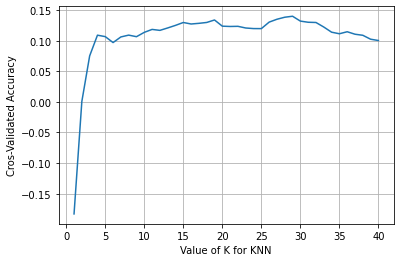

In [127]:
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cros-Validated Accuracy')
plt.grid()

In [128]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.14017974216918605
{'n_neighbors': 29}
KNeighborsRegressor(n_neighbors=29)


In [145]:
%%time

param_grid = {'n_neighbors' : list(range(1,41)),
              'weights' : ['uniform', 'distance']} 
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=2)
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.1496435702742877
{'n_neighbors': 29, 'weights': 'distance'}
KNeighborsRegressor(n_neighbors=29, weights='distance')
CPU times: user 574 ms, sys: 0 ns, total: 574 ms
Wall time: 577 ms


In [144]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_neighbors' : list(range(1,41)),
              'weights' : ['uniform', 'distance']} 
knn = KNeighborsRegressor()
grid = RandomizedSearchCV(knn, param_grid, cv=2)
grid.fit(X,y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.14168243744638453
{'weights': 'distance', 'n_neighbors': 31}
KNeighborsRegressor(n_neighbors=31, weights='distance')
CPU times: user 130 ms, sys: 0 ns, total: 130 ms
Wall time: 140 ms


In [206]:
from sklearn.linear_model import  LinearRegression, Ridge, Lasso, ElasticNetCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import uniform

import warnings
warnings.filterwarnings('ignore')

In [212]:
models = [
         {'name':'LinearRegression', 'model': LinearRegression(),'params':{'n_jobs':['True', 'False']}},
         {'name':'ElasticNetCV', 'model': ElasticNetCV( ),'params':{'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}},
         {'name':'Lasso', 'model': Lasso(), 'params':{'alpha': uniform(loc=0, scale = 4)}},
         {'name':'RidgeCV', 'model': RidgeCV(), 'params':{'gcv_mode':['auto', 'svd', 'eigen']}},
         {'name':'Ridge', 'model': Ridge(), 'params':{'alpha': uniform(loc=0, scale = 4), 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}},
         {'name':'DecisionTreeRegressor', 'model': DecisionTreeRegressor(), 'params':{'criterion': ["squared_error", "friedman_mse", "absolute_error","poisson"], 'max_depth': list(range(1,20))}},
         {'name':'KNeighborsRegressor', 'model': KNeighborsRegressor( ), 'params':{'n_neighbors' : list(range(1,41)), 'weights':['uniform', 'distance'], 'p': [1,2,3]}}]

res = []
for i in models:
  res.append((i['name'], RandomizedSearchCV(i['model'], i['params'], cv = 4).fit(X_train, y_train)))

In [213]:
for r in res:
  print(r[0], r[1].best_score_, r[1].best_params_)

LinearRegression 0.7133068441014865 {'n_jobs': 'True'}
ElasticNetCV 0.6820751482110505 {'l1_ratio': 1}
Lasso 0.691304078814256 {'alpha': 0.5063874796698817}
RidgeCV 0.7130569928362006 {'gcv_mode': 'auto'}
Ridge 0.7124567249918105 {'alpha': 0.26503038949461644, 'solver': 'svd'}
DecisionTreeRegressor 0.7089864549611542 {'max_depth': 4, 'criterion': 'absolute_error'}
KNeighborsRegressor 0.4478374218854836 {'weights': 'uniform', 'p': 1, 'n_neighbors': 9}
